Значение p-values оказалось меньше либо равным 0.05 в 4.64% случаев,
что говорит о том, что наша система сплитования работает корректно!


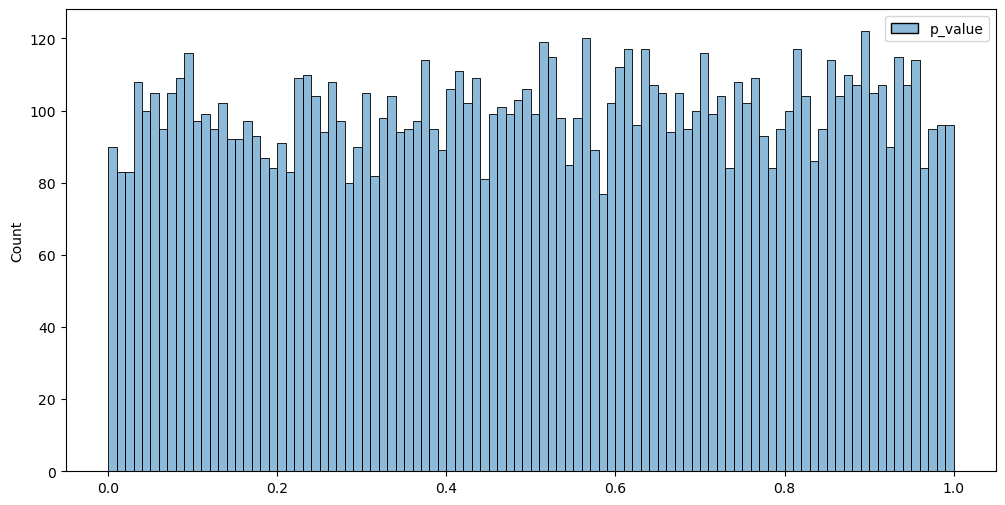

In [2]:
import pandas as pd
import pandahouse as ph
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

    

def get_pvalues(df, test_group_1, test_group_2, num_tests):
    p_values = []
    for _ in range(num_tests):
        df_group_2 = df[df.exp_group == test_group_1].sample(n=500)
        df_group_3 = df[df.exp_group == test_group_2].sample(n=500)
        result = stats.ttest_ind(df_group_2.ctr,
                                 df_group_3.ctr,
                                 equal_var=False)
        p_values += [result[1]]
    return pd.DataFrame(p_values, columns=['p_value'])

connection = {
              'host': 'https://clickhouse.lab.karpov.courses',
              'database':'simulator_20230220',
              'user':'student', 
              'password':'dpo_python_2020'
              }

query = '''
select exp_group,
       user_id,
       sum(action='like') likes,
       sum(action='view') views,
       likes/views ctr
from {db}.feed_actions 
where toDate(time) >= '2023-01-24' and toDate(time) <= '2023-01-30'
group by exp_group,
       user_id
'''

num_tests=10000

df_test = ph.read_clickhouse(query, connection=connection)

df_pvalues = get_pvalues(df_test, 2, 3, num_tests=num_tests)

plt.figure(figsize=(12, 6))
sns.histplot(df_pvalues, bins=100)

percent_pvalue_05 = round(df_pvalues[df_pvalues <= 0.05].count() / num_tests * 100, 2)[0]
answer = 'корректно'

print(f'Значение p-values оказалось меньше либо равным 0.05 в {percent_pvalue_05}% случаев,')
if percent_pvalue_05 > 5:
    answer = 'некорректно'
print(f'что говорит о том, что наша система сплитования работает {answer}!')